## Regression Neural Network

In [7]:
#!pip3 install tensorflow
#!pip3 install keras

In [17]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
# Importing prepared dataset
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [37]:
X_train.head(5)

,NumWebVisitsMonth,all_Response,Age,all_Purchases,Education
1313,2.0,0.0,66.0,26.000000,0
1263,8.0,0.0,61.0,8.000000,2
1009,6.0,0.0,58.0,4.000000,4
492,6.0,1.0,66.0,22.000000,2
1623,9.0,0.0,62.0,23.121713,2


будет использовано 5 переменных: кол-во визитов, отклик на стратегию, возраст, кол-во покупок и образование.

Для нейронных сетей необходимо шкалирование данных.

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [39]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential #сети с последовательной передачей сигнала
from keras.layers import Dense  #для описания слоев нейронной сети

In [40]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(6, activation = 'tanh', input_dim = 5)) #на вход 5 переменных

# Adding the second hidden layer
rnn.add(Dense(4, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [41]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
224/224 [==============================] - 0s 807us/step - loss: 0.5733 - accuracy: 0.0000e+00
Epoch 2/100
224/224 [==============================] - 0s 791us/step - loss: 0.3429 - accuracy: 0.0000e+00
Epoch 3/100
224/224 [==============================] - 0s 736us/step - loss: 0.3251 - accuracy: 0.0000e+00
Epoch 4/100
224/224 [==============================] - 0s 795us/step - loss: 0.3184 - accuracy: 0.0000e+00
Epoch 5/100
224/224 [==============================] - 0s 749us/step - loss: 0.3133 - accuracy: 0.0000e+00
Epoch 6/100
224/224 [==============================] - 0s 786us/step - loss: 0.3084 - accuracy: 0.0000e+00
Epoch 7/100
224/224 [==============================] - 0s 813us/step - loss: 0.3054 - accuracy: 0.0000e+00
Epoch 8/100
224/224 [==============================] - 0s 781us/step - loss: 0.3020 - accuracy: 0.0000e+00
Epoch 9/100
224/224 [==============================] - 0s 791us/step - loss: 0.2996 - accuracy: 0.0000e+00
Epoch 10/100
224/224 [===============

Epoch 77/100
224/224 [==============================] - 0s 784us/step - loss: 0.2605 - accuracy: 0.0000e+00
Epoch 78/100
224/224 [==============================] - 0s 840us/step - loss: 0.2598 - accuracy: 0.0000e+00
Epoch 79/100
224/224 [==============================] - 0s 789us/step - loss: 0.2607 - accuracy: 0.0000e+00
Epoch 80/100
224/224 [==============================] - 0s 774us/step - loss: 0.2600 - accuracy: 0.0000e+00
Epoch 81/100
224/224 [==============================] - 0s 802us/step - loss: 0.2596 - accuracy: 0.0000e+00
Epoch 82/100
224/224 [==============================] - 0s 792us/step - loss: 0.2603 - accuracy: 0.0000e+00
Epoch 83/100
224/224 [==============================] - 0s 787us/step - loss: 0.2599 - accuracy: 0.0000e+00
Epoch 84/100
224/224 [==============================] - 0s 820us/step - loss: 0.2595 - accuracy: 0.0000e+00
Epoch 85/100
224/224 [==============================] - 0s 768us/step - loss: 0.2598 - accuracy: 0.0000e+00
Epoch 86/100
224/224 [======

In [42]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

In [43]:
# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [44]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)))), sqrt(mean_squared_error(y_test, y_hat))

(10722.681120157764, 10423.820440874448)

Сеть не переобучена.
Ошибка стала меньше, чем в продыдущих рассмотренных моделях моделях.

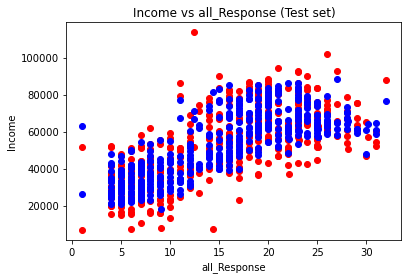

In [45]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], y_hat, 'bo')
plt.title('Income vs all_Response (Test set)')
plt.xlabel('all_Response')
plt.ylabel('Income')
plt.show()